<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


In [0]:
# Dependencies
import pickle
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

import warnings 
warnings.filterwarnings('ignore')

In [0]:
# Load Data
with open('train_filenames.pickle', 'rb') as f: 
  train_filenames = pickle.load(f)

with open('test_filenames.pickle', 'rb') as f: 
  test_filenames = pickle.load(f)

train_nofeats = pd.read_pickle('train_nofeats.pickle')
test_nofeats = pd.read_pickle('test_nofeats.pickle')

In [0]:
# Feature Extraction Functions

# 1
def get_size(img):
  ''' 
  return image size (height * width)
  '''
  return img.shape[0] * img.shape[1]

# 2
def get_width(img): 
  '''
  return image width 
  '''
  return img.shape[1]

# 3
def get_height(img): 
  '''
  return image height
  '''
  return img.shape[0]

# 4
def aspect_ratio(img):
  '''
  return aspect ratio (height / width)
  '''
  return img.shape[0] / img.shape[1]

# 5
def get_num_corners(img):
  '''
  returns number of corners detected by Harris corner detector
  '''
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  gray = np.float32(gray)
  dst = cv.cornerHarris(gray, 2, 3, 0.04)
  dst = cv.dilate(dst, None)
  return len(dst)

# 6
def get_num_goodfeats(img):
  '''
  returns the number of strong corners
  '''
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  features = cv.goodFeaturesToTrack(gray,25,0.01,10)
  features = np.int0(features)
  return len(features)

# 7-9
def avg_intensity(img, i):
  '''
  returns the average intensity of red, blue, or green pixels
  '''
  return img[:, :, i].mean()

# 10-12
def sd_intensity(img, i):
  '''
  returns the standard deviation intensity of red, blue, or green pixels
  ''' 
  return img[:, :, i].std()

# 13
def avg_gray(img): 
  '''
  returns the average greyscale value
  '''
  return np.mean(np.mean(img[:, :, 0] + img[:, :, 1] + img[:, :, 2] / 3))

# 14
def blob_data(img):
  '''
  returns the number of blobs in the image
  '''
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  detector = cv.SimpleBlobDetector_create()
  kp = detector.detect(gray)
  return len(kp)

# 15
def orb(img):  
  '''
  returns number of keypoints in image
  '''
  gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  orb = cv.ORB_create()
  kp, desc = orb.detectAndCompute(gray, None)
  return len(kp)

In [0]:
def to_rgb(img): 
  if len(img.shape) == 2:
    img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
  return img

def feature_frame(df):
  df['Pictures'] = df['Pictures'].apply(to_rgb)
  pics = df['Pictures']
  df['Size'] = pics.apply(get_size)
  df['Width'] = pics.apply(get_width)
  df['Height'] = pics.apply(get_height)
  df['Aspect_Ratio'] = pics.apply(aspect_ratio)  
  df['Num_Corners'] = pics.apply(get_num_corners)
  df['Num_Goodfeats1'] = pics.apply(get_num_goodfeats)
  df['Avg_Red_Inten'] = pics.apply(avg_intensity, i = 0)
  df['Avg_Blue_Inten'] = pics.apply(avg_intensity, i = 1)
  df['Avg_Green_Intensity'] = pics.apply(avg_intensity, i = 2)
  df['Avg_Gray'] = pics.apply(avg_gray)
  df['Sd_Red_Inten'] = pics.apply(sd_intensity, i = 0)
  df['Sd_Blue_Inten'] = pics.apply(sd_intensity, i = 1)
  df['Sd_Green_Intensity'] = pics.apply(sd_intensity, i = 2)
  df['Blob'] = pics.apply(blob_data)
  df['Orb'] = pics.apply(orb)
  return df

In [0]:
train = feature_frame(train_nofeats)

In [0]:
train.head()

,Pictures,Encoding,Size,Width,Height,Aspect_Ratio,Num_Corners,Num_Goodfeats1,Avg_Red_Inten,Avg_Blue_Inten,Avg_Green_Intensity,Avg_Gray,Sd_Red_Inten,Sd_Blue_Inten,Sd_Green_Intensity,Blob,Orb
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,56840,392,145,0.369898,145,25,183.353871,172.750792,158.170426,196.520185,58.678952,64.373675,68.605936,1,320
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,73784,401,184,0.458853,184,25,210.739822,189.280101,164.805242,234.750732,55.293247,74.486619,70.417988,3,413
2,"[[[255, 255, 255], [253, 254, 255], [248, 255,...",0,77220,396,195,0.492424,195,25,141.909182,130.856617,99.079850,163.119326,71.292891,80.439813,98.229517,6,437
3,"[[[61, 78, 60], [58, 75, 57], [43, 60, 42], [5...",0,71640,398,180,0.452261,180,25,118.465075,121.542714,80.780444,174.011320,64.407947,63.487200,73.634976,8,415
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,68950,394,175,0.444162,175,25,162.078550,165.182422,156.642117,209.623930,70.450129,74.617125,88.208140,8,399


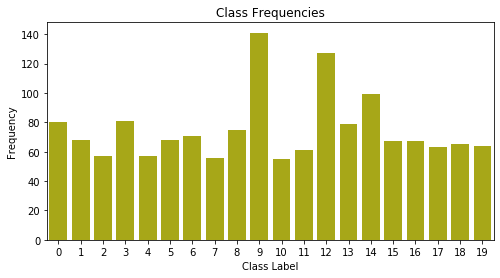

In [0]:
# Graphical Summary of Class Frequencies
class_freq = train['Encoding'].value_counts().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x = 'index', y = 'Encoding', data = class_freq, color = 'y')
plt.title('Class Frequencies')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

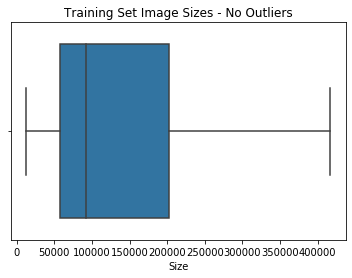

In [0]:
# Graphical Summary of Image Sizes (No Outliers)
sns.boxplot(train['Size'], showfliers=False)
plt.title("Training Set Image Sizes - No Outliers")
plt.show()

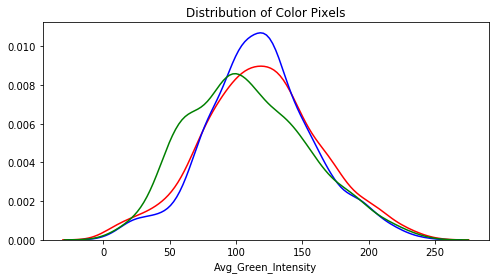

In [0]:
plt.figure(figsize=(8, 4))
sns.distplot(train['Avg_Red_Inten'], color = 'red', hist = False)
sns.distplot(train['Avg_Blue_Inten'], color = 'blue', hist = False)
sns.distplot(train['Avg_Green_Intensity'], color = 'green', hist = False)
plt.title("Distribution of Color Pixels")
plt.show()

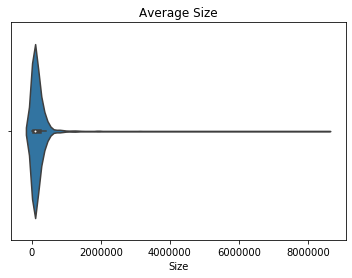

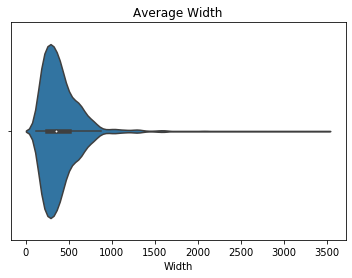

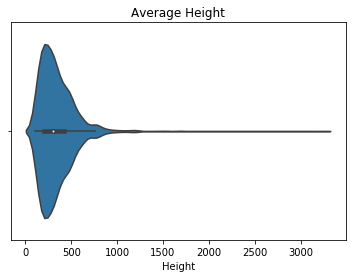

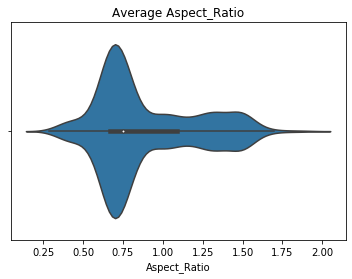

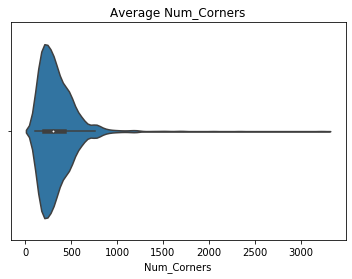

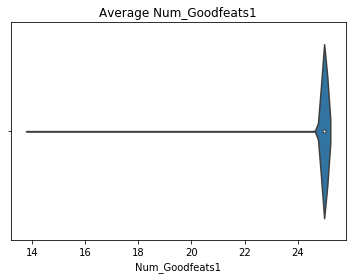

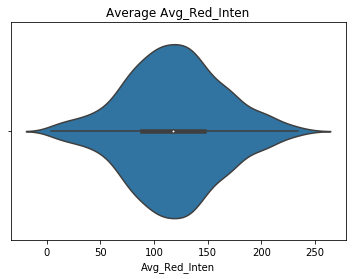

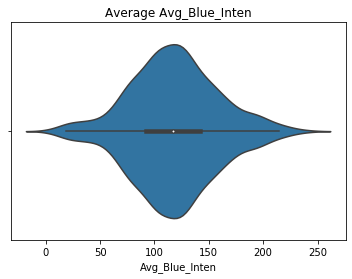

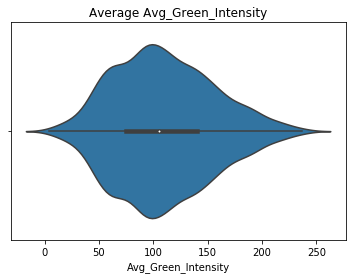

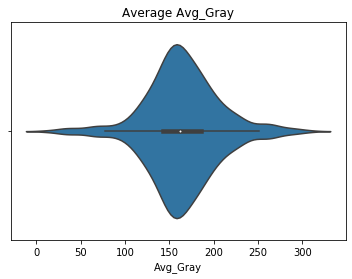

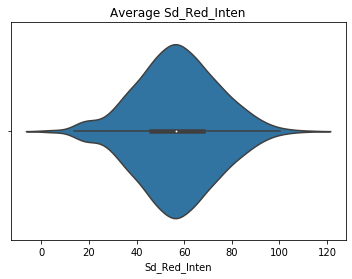

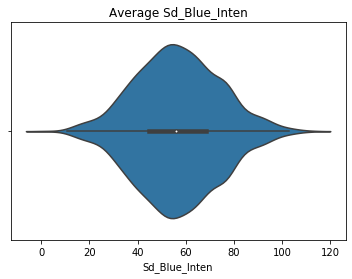

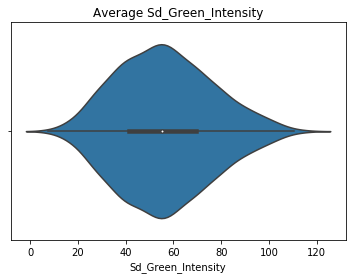

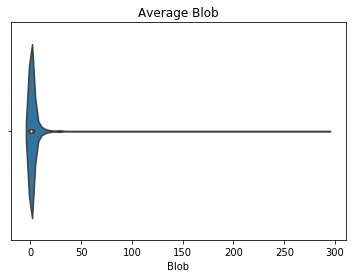

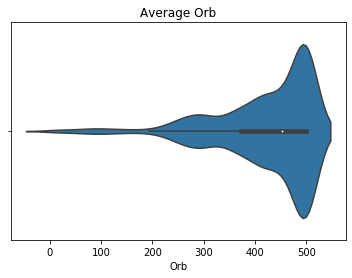

In [0]:
train_averages = train.groupby('Encoding').mean()

for idx, col in enumerate(train_averages.columns): 
  sns.violinplot(train[col])
  plt.title('Average ' + col)
  plt.show()

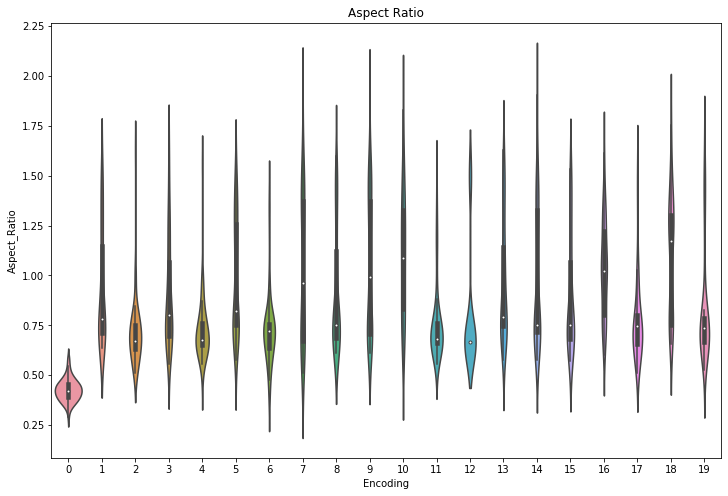

In [0]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Encoding', y = 'Aspect_Ratio', data = train)
plt.title('Aspect Ratio')
plt.show()

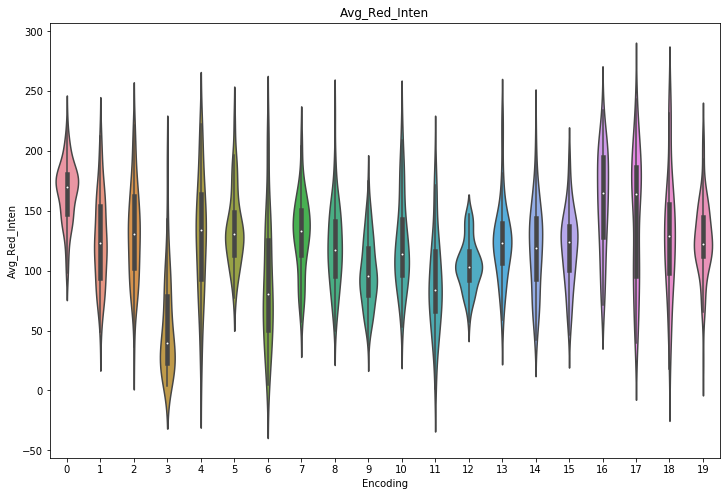

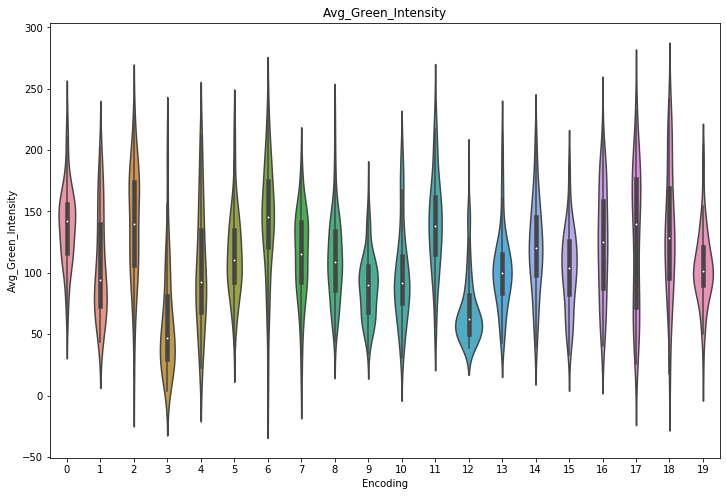

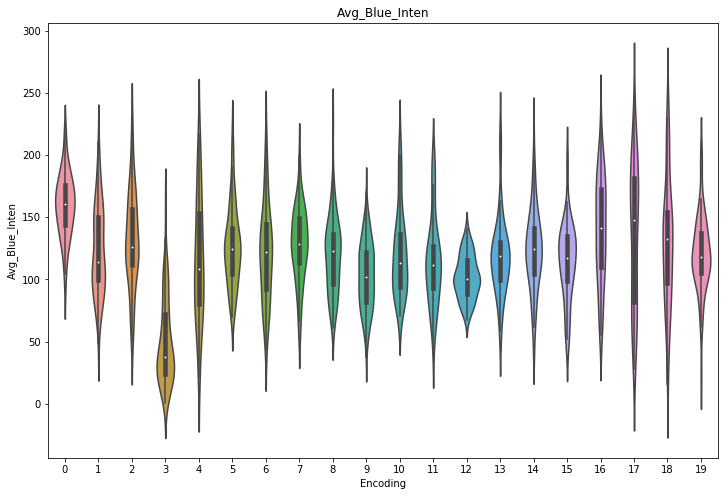

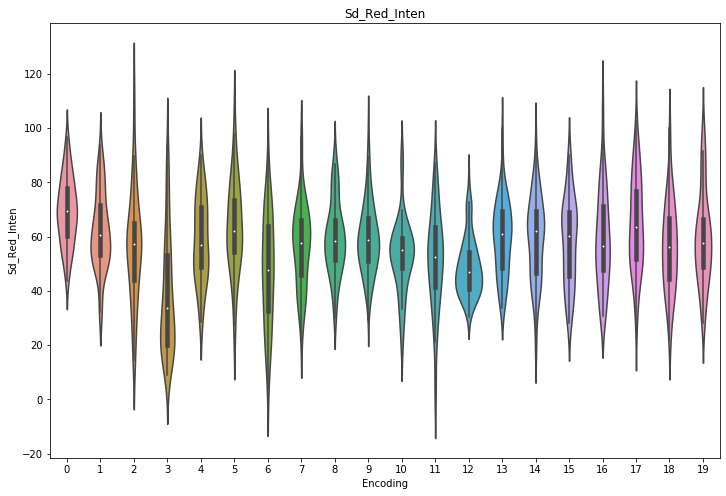

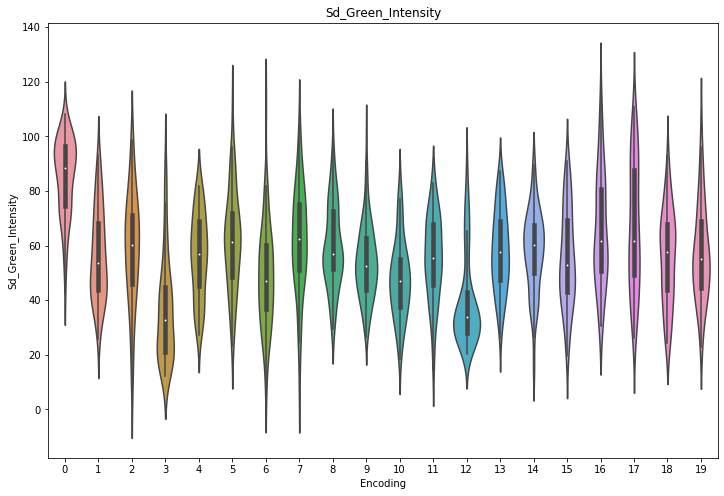

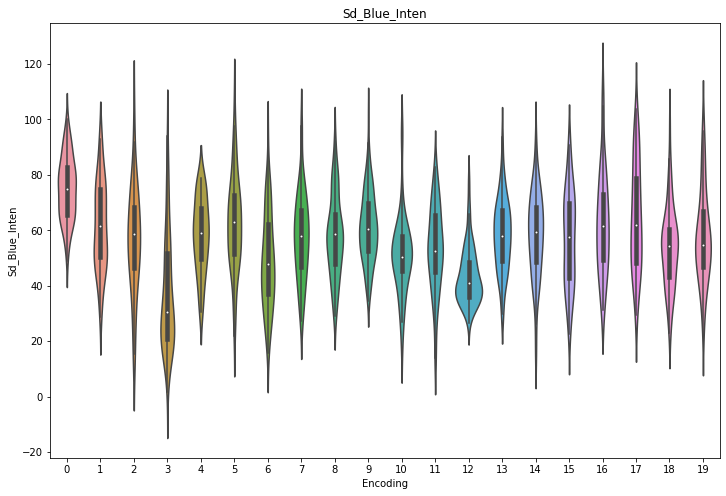

In [0]:
intensities = ['Avg_Red_Inten', 'Avg_Green_Intensity', 'Avg_Blue_Inten', 
               'Sd_Red_Inten', 'Sd_Green_Intensity', 'Sd_Blue_Inten']

for intensity in intensities:
  plt.figure(figsize=(12, 8))
  sns.violinplot(x='Encoding', y = intensity, data = train)
  plt.title(intensity)
  plt.show()

In [0]:
test = feature_frame(test_nofeats)

In [0]:
test.head()

,Pictures,Size,Width,Height,Aspect_Ratio,Num_Corners,Num_Goodfeats1,Avg_Red_Inten,Avg_Blue_Inten,Avg_Green_Intensity,Avg_Gray,Sd_Red_Inten,Sd_Blue_Inten,Sd_Green_Intensity,Blob,Orb
0,"[[[235, 255, 255], [230, 255, 255], [229, 255,...",187500,375,500,1.333333,500,25,95.186693,118.509744,87.565381,151.968716,68.958938,73.556732,58.836603,2,500
1,"[[[119, 148, 128], [96, 125, 105], [100, 127, ...",252600,600,421,0.701667,421,25,145.787692,137.946944,70.966722,141.949956,73.792890,68.894450,44.913171,7,500
2,"[[[91, 69, 72], [81, 59, 62], [101, 78, 84], [...",77100,300,257,0.856667,257,25,91.479066,86.534734,83.341427,158.728128,51.846347,48.040352,44.441822,14,461
3,"[[[247, 246, 251], [246, 245, 250], [253, 252,...",38700,180,215,1.194444,215,25,108.750517,109.949690,88.996537,152.653471,77.438934,77.506887,78.542950,2,381
4,"[[[9, 20, 16], [9, 20, 16], [10, 19, 16], [10,...",67500,300,225,0.750000,225,25,71.144548,76.281126,81.393852,110.659358,61.325488,57.891330,61.383994,0,431
